# Import required packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Exercise 1 - Calculating the Eye Aspect Ratio (EAR) for liveness detection

In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

For anti-spoofing in face recognition, we have to distinguish whether the face images are real faces captured from a live person or are spoof faces (i.e. faces detected from an image in a device like mobile phone), this is called liveness detection. 

One of the liveness detection methods is to detect eyes blinking, this can be done by estimating the level of the eye opening from the eyes facial landmarks (i.e. the coordinates of various points in the region around the eyes)$^{[1]}$. The level of the eye opening is measured by a scalar quantity called Eye Aspect Ratio (EAR) defined by the below equation:



\begin{equation}
EAR = \frac{||p_2 - p_6||+||p_3 - p_5||}{2 ||p_1 - p_4||},
\end{equation}


where $p_i$ for $i=1,2 \ldots 6$ are the points specified in the below figure, these can be obtained by the face_recognition library, each point $p_i$ is represented by a tuple of $(x_i, y_i)$ coordinates:



<br>
<center>
<img src='eye.jpg' width="540" height="540" />    
<figcaption >Fig.1 - Eyes facial landmarks.</figcaption>
</center>
<br>




and $||p_i-p_j||$ is the Euclidean distance between the points $p_i$ and $p_j$, given by the below equation:

\begin{equation}
||p_i-p_j|| = \sqrt{(x_i - x_j)^2+(y_i - y_j)^2}
\end{equation}

When the eyes blink, the EARs drop temporarily (Fig.2), these eyes blinking events can then by recognized by thresholding or by machine learning methods, such as support vector machine.



<br>
<center>
<img src="eye2.jpg" width="540" height="540" />    
<figcaption >Fig.2 - Plot of EAR from several frames of a video capturing a single eyes blink event.</figcaption>
</center>
<br>



Reference: 
1. T. Soukupova and J. Cech, “Real-time eye blink detection using facial landmarks,” in 21st Computer Vision Winter Workshop (CVWW2016),2016, pp. 1–8.

### Problem

You are given a list of list of tuples storing the eyes facial landmarks, i.e. a list storing the eyes landmarks of different video frames, the landmarks of each frame is stored in another list of tuples, the $1^{st},2^{nd},\ldots,6^{th}$ tuples are the points $p_1, p_2,\ldots,p_6$ respectively, and each tuple $(x_i,y_i)$ is the x,y-coordinate of the point $p_i$. Some elements of the list are empty lists, which means no faces are detected in that frame. 

__Write two functions, one for calculating the Euclidean distance, one for calculating the EAR.__

For the Euclidean distance function, accepts two tuples representing the coordinates of two points as the function arguments and return the Euclidean distance, name the function as distance().

For the EAR function, accepts a list of tuples (the landmarks of each video frame) as the function argument. Determine whether the input is an empty list, returns None if so, otherwise calculates and returns the EAR. Name the function as eye_aspect_ratio().

In [ ]:
landmarks = [[(48, 58), (59, 56), (69, 56), (79, 60), (69, 63), (58, 63)],
[(124, 60), (134, 56), (144, 56), (152, 58), (145, 63), (134, 63)],
[],
[(67, 58), (78, 56), (89, 56), (98, 61), (88, 63), (77, 62)],
[(144, 61), (154, 57), (164, 56), (172, 59), (164, 63), (154, 63)],
[(67, 58), (77, 56), (88, 56), (98, 61), (87, 63), (76, 63)],
[(144, 61), (154, 57), (164, 56), (172, 59), (164, 63), (154, 63)],
[(66, 58), (77, 56), (88, 56), (97, 61), (87, 63), (76, 62)],
[(144, 61), (154, 57), (164, 56), (172, 59), (164, 63), (154, 63)],
[(66, 58), (77, 55), (88, 56), (97, 61), (87, 63), (76, 63)],
[(142, 61), (152, 56), (163, 55), (171, 58), (164, 63), (153, 63)],
[(60, 59), (70, 57), (81, 57), (90, 61), (80, 63), (69, 63)],
[(136, 60), (146, 56), (156, 56), (165, 58), (157, 62), (147, 63)],
[(61, 59), (71, 56), (82, 57), (90, 61), (81, 63), (70, 63)],
[(138, 61), (148, 56), (158, 55), (166, 58), (159, 63), (149, 63)],
[(61, 56), (71, 53), (82, 53), (91, 58), (81, 61), (70, 61)],
[],
[],
[(137, 57), (147, 52), (157, 52), (165, 55), (158, 59), (148, 59)],
[(35, 47), (47, 46), (58, 47), (67, 51), (57, 53), (46, 52)],
[(112, 53), (122, 48), (133, 48), (140, 51), (133, 55), (123, 55)],
[(68, 78), (80, 75), (91, 75), (101, 81), (90, 83), (78, 83)],
[(146, 81), (157, 76), (167, 76), (175, 78), (168, 83), (158, 84)],
[(31, 49), (42, 47), (54, 47), (63, 53), (52, 55), (41, 54)],
[(108, 53), (118, 48), (128, 47), (136, 50), (129, 55), (119, 56)],
[(31, 51), (42, 48), (54, 48), (63, 54), (52, 56), (41, 55)],
[(107, 54), (117, 48), (128, 48), (136, 51), (129, 56), (118, 56)],
[(64, 59), (74, 55), (85, 56), (96, 61), (85, 64), (73, 63)],
[(141, 60), (151, 54), (161, 54), (170, 57), (162, 62), (152, 62)],
[(59, 59), (70, 57), (81, 57), (90, 61), (80, 63), (69, 63)],
[(136, 60), (147, 55), (157, 55), (165, 57), (158, 61), (148, 62)],
[(61, 60), (72, 59), (82, 59), (92, 62), (82, 64), (71, 64)],
[(136, 61), (147, 59), (156, 59), (165, 60), (157, 64), (147, 64)],
[(59, 59), (70, 56), (81, 56), (91, 61), (81, 64), (69, 63)],
[(137, 60), (147, 55), (157, 54), (166, 57), (158, 62), (148, 63)],
[(60, 58), (71, 55), (82, 55), (92, 61), (81, 63), (70, 63)],
[],
[(137, 60), (148, 54), (158, 54), (167, 57), (159, 62), (149, 62)],
[(64, 58), (75, 56), (85, 56), (95, 60), (85, 62), (74, 62)],
[(140, 59), (150, 56), (160, 55), (168, 57), (160, 62), (150, 62)]]

### Write your code here

In [ ]:
#========Write your code here==========

def distance(pi,pj):
    xi, yi = pi
    xj, yj = pj
    
    #Euclidean distance
    return ((xi-xj)**2 + (yi-yj)**2)**0.5

def eye_aspect_ratio(lm):
    d15 = distance(lm[1], lm[5])
    d24 = distance(lm[2], lm[4])
    d03 = distance(lm[0], lm[3])
    ear = (d15+d24)/(2*d03)
    return ear




#======================================

### Call the functions to calculate the EARs and store them in a list

In [ ]:
ears = [eye_aspect_ratio(lm) for lm in landmarks if bool(lm)]

### Plot the EARs vs frames

In [ ]:
print('ears =',ears)

In [ ]:
plt.title('Eyes aspect ratio vs frames')
plt.ylabel('Eyes aspect ratio')
plt.xlabel('Video frames')
plt.plot(ears)
plt.savefig('ears.jpg')
plt.show()

### Expected output

ears = [0.22648184989793518,
 0.25063051794381147,
 0.21117201950607664,
 0.23155291246070636,
 0.22703830459324992,
 0.23155291246070636,
 0.21117201950607664,
 0.23155291246070636,
 0.2429509000233231,
 0.25953439220690955,
 0.2023096723832625,
 0.22625276007367182,
 0.22625276007367182,
 0.2687000738164234,
 0.26814670400222457,
 0.2518963609299392,
 0.18861845900368043,
 0.25063051794381147,
 0.24608323461401413,
 0.25953439220690955,
 0.2374843304025684,
 0.2862991671569341,
 0.23828761383319533,
 0.27653315937748607,
 0.25048402753040816,
 0.27653315937748607,
 0.19581105411063263,
 0.22558632928856764,
 0.1625494704577511,
 0.17401759809437203,
 0.23502684515816877,
 0.27653315937748607,
 0.25084561729742894,
 0.2674082098871901,
 0.19447894405226387,
 0.23155291246070636]

<br>

<img src="ears.jpg" width="420" height="420" />    

<br>

# Exercise 2 - Power Set

## Power set function

In [8]:
input_set = [1,2,3]
#input_set = np.random.randint(0,100,5) #uncomment this line to generate random integers

#========Write your code here==========


def power_set(input_set, result=None):
    if result == None:
        result = [()]
        
    if len(input_set) == 0:
        return result
    
    else:
        temp_lst = list(result)
        for element in temp_lst:
            temp = list(element)
            temp.append(input_set[0])
            result.append(tuple(temp))
        return power_set(input_set[1:], result)



#======================================


ans = power_set(input_set)
set(ans)

{(), (1,), (1, 2), (1, 2, 3), (1, 3), (2,), (2, 3), (3,)}

In [ ]:
expected_output = []
for i in range(len(input_set)+1):
    expected_output.extend(tuple(combinations(input_set,i)))

print('Answer correct?',set(expected_output)==set(ans))
print('Expected output:')
set(expected_output)

## Combination function

In [ ]:
input_set = [1,2,3,4,5]
r = 2
#input_set = np.random.randint(0,100,5) #uncomment this line to generate random integers

#========Write your code here==========

def generate_combinations(input_set,r,result=None,comb_result=None):
    if result == None:
        result = [()]
        
    if comb_result == None:
        comb_result = []
        
    if len(input_set) == 0:
        return result
    
    else:
        temp_lst = list(result)
        for element in temp_lst:
            temp = list(element)
            temp.append(input_set[0])
            result.append(tuple(temp))
            
            if len(temp)==r:
                comb_result.append(tuple(temp))
            
        return generate_combinations(input_set[1:], r, result)







#======================================
ans = set(generate_combinations(input_set, r))
set(ans)

In [ ]:
expected_output = set(combinations(input_set, r))
print('Answer correct?',expected_output==ans)
print('Expected output:')
set(expected_output)

# Exercise 3 - Class and Object

In [9]:
# rectangle class
class rectangle:
    
#========Write your code here==========
    def __init__(self, height, width):
        self.height = height
        self.width = width
        
    def get_perimeter(self):
        return 2*(self.height+self.width)
    
    def get_area(self):
        return self.height*self.width




        
#======================================     

    # Method to draw the rectanlge, DO NOT edit this method
    def draw(self):
        rectangle = plt.Rectangle((0,0),self.width,self.height, facecolor="tab:blue",
                    edgecolor="tab:blue", linewidth=3)
        plt.gca().add_patch(rectangle)
        plt.axis('equal')
        plt.show()
        
# square class        
class square(rectangle):
    
#========Write your code here==========
    def __init__(self, length):
        super().__init__(length, length)

        
    
    
#======================================

The perimeter of the rectangle is: 30
The area of the rectangle is: 50


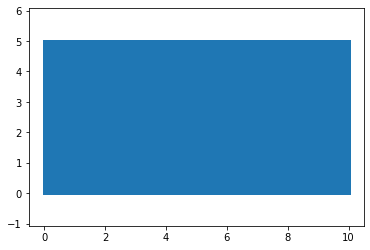

In [10]:
r1 = rectangle(5,10)

print('The perimeter of the rectangle is:', r1.get_perimeter())
print('The area of the rectangle is:', r1.get_area())
r1.draw()

The perimeter of the square is: 40
The area of the square is: 100


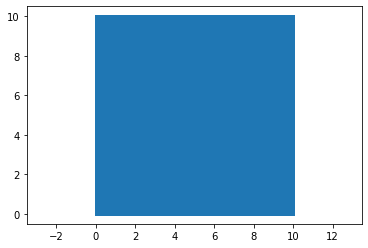

In [11]:
s1 = square(10)

print('The perimeter of the square is:', s1.get_perimeter())
print('The area of the square is:', s1.get_area())
s1.draw()